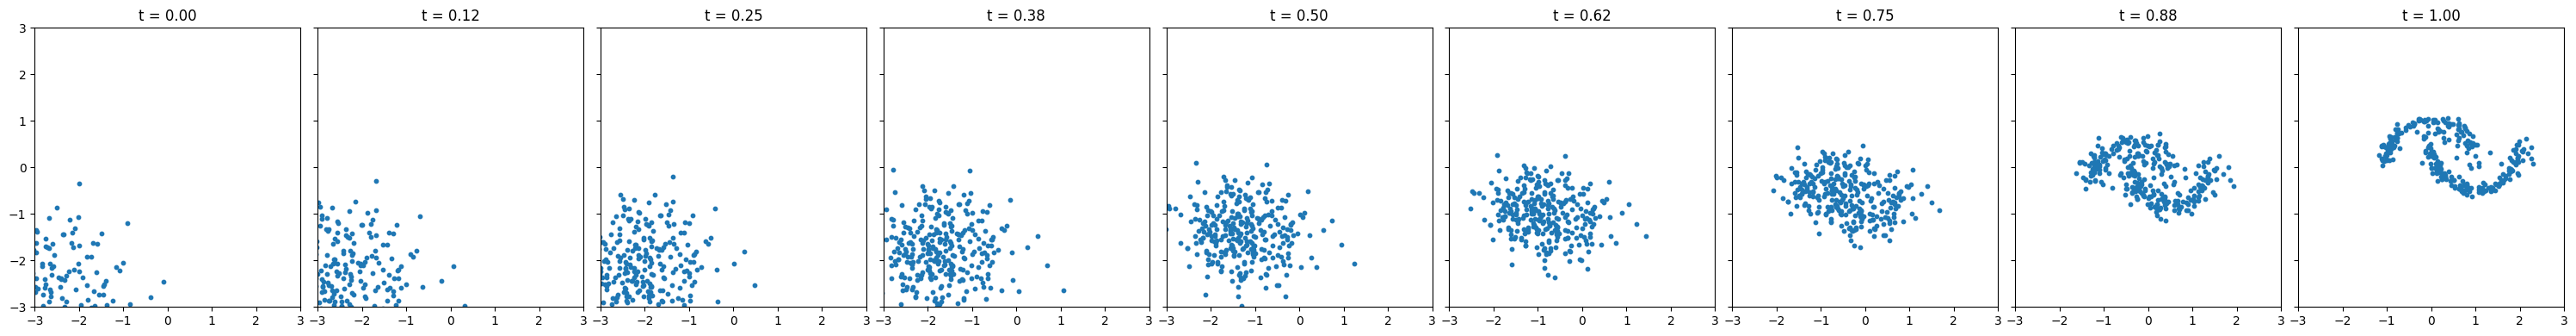

In [1]:
import torch
from torch import nn, Tensor
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
class Flow(nn.Module):
    def __init__(self, dim: int = 2, h: int = 64):
        super().__init__()
        self.net = nn.Sequential(
        nn.Linear(dim+1 , h), nn.ELU(), nn.Linear(h, h), nn.ELU(), nn.Linear(h, h), nn.ELU(), nn.Linear(h, dim))
    def forward(self, x_t: Tensor, t: Tensor) -> Tensor: 
        # return self.net(x_t)
        return self.net(torch.cat((t, x_t), -1))
    def step(self, x_t: Tensor, t_start: Tensor, t_end: Tensor) -> Tensor:
        t_start = t_start.view(1, 1).expand(x_t.shape[0], 1)
        # For simplicity, using midpoint ODE solver in this example
        return x_t + (t_end - t_start) * self(x_t + self(x_t, t_start) * (t_end - t_start) / 2, t_start + (t_end - t_start) / 2)
# training
flow = Flow()
optimizer = torch.optim.Adam(flow.parameters(), 1e-2) 
loss_fn = nn.MSELoss()
bias = 3.0
for _ in range(10000):
    x_1 = Tensor(make_moons(256, noise=0.05)[0]) 
    x_0 = torch.randn_like(x_1)-bias
    t = torch.rand(len(x_1), 1)
    x_t = (1 - t) * x_0 + t * x_1
    dx_t = x_1 - x_0
    optimizer.zero_grad()
    loss_fn(flow(x_t, t), dx_t).backward() 
    optimizer.step()
# sampling
x = torch.randn(300, 2)-bias
n_steps = 8
fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4), sharex=True, sharey=True) 
time_steps = torch.linspace(0, 1.0, n_steps + 1)
axes[0].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10) 
axes[0].set_title(f't = {time_steps[0]:.2f}') 
axes[0].set_xlim(-3.0, 3.0)
axes[0].set_ylim(-3.0, 3.0)
for i in range(n_steps):
    x = flow.step(x, time_steps[i], time_steps[i + 1])
    axes[i + 1].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10) 
    axes[i + 1].set_title(f't = {time_steps[i + 1]:.2f}')
plt.tight_layout()
plt.show()

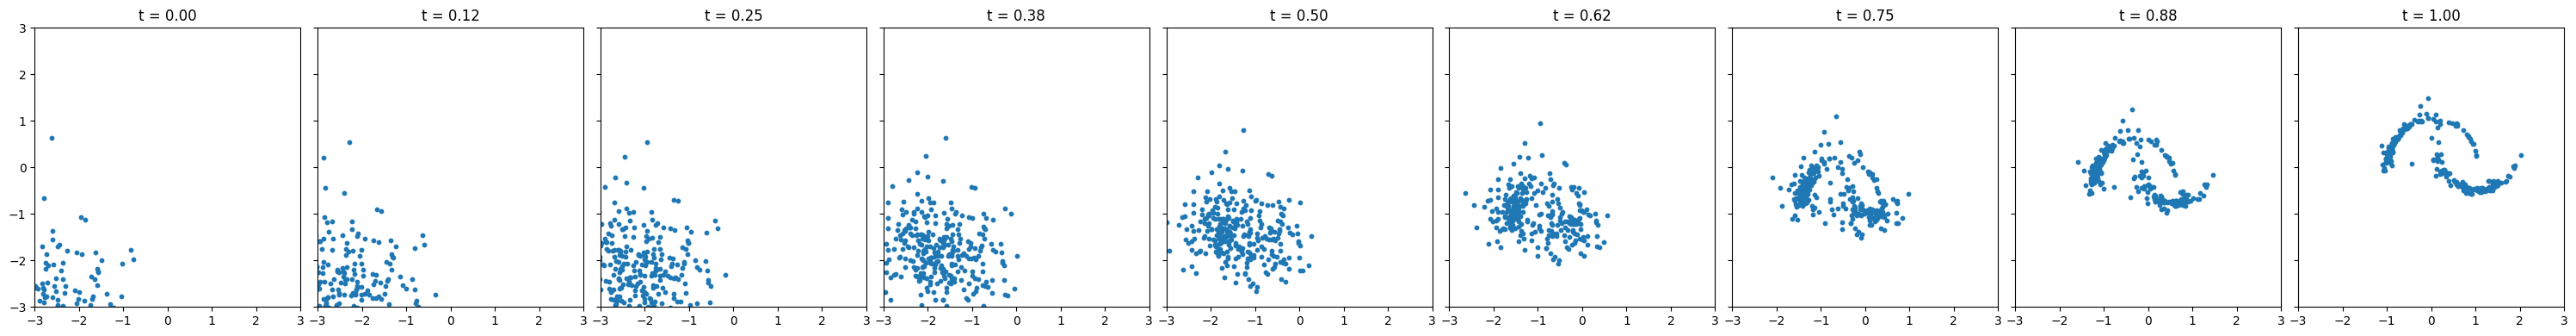

In [9]:
import torch
from torch import nn, Tensor
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
class Flow(nn.Module):
    def __init__(self, dim: int = 2, h: int = 64):
        super().__init__()
        self.net = nn.Sequential(
        nn.Linear(dim+1 , h), nn.ELU(), nn.Linear(h, h), nn.ELU(), nn.Linear(h, h), nn.ELU(), nn.Linear(h, dim))
    def forward(self, x_t: Tensor, t: Tensor) -> Tensor: 
        # return self.net(x_t)
        return self.net(torch.cat((t, x_t), -1))
    def step(self, x_t: Tensor, t_start: Tensor, t_end: Tensor) -> Tensor:
        t_start = t_start.view(1, 1).expand(x_t.shape[0], 1)
        # For simplicity, using midpoint ODE solver in this example
        return x_t + (t_end - t_start) * self(x_t + self(x_t, t_start) * (t_end - t_start) / 2, t_start + (t_end - t_start) / 2)
# training
flow = Flow()
optimizer = torch.optim.Adam(flow.parameters(), 1e-2) 
loss_fn = nn.MSELoss()
bias = 3.0
for _ in range(10000):
    x_1 = Tensor(make_moons(256, noise=0.05)[0]) 
    x_0 = torch.randn_like(x_1)-bias
    t = torch.cat([torch.rand(len(x_1) // 2, 1) * 0.1, 0.9 + torch.rand(len(x_1) // 2, 1) * 0.1], dim=0)
    # t = torch.rand(len(x_1), 1)*0.5+0.5
    x_t = (1 - t) * x_0 + t * x_1
    dx_t = x_1 - x_0
    optimizer.zero_grad()
    loss_fn(flow(x_t, t), dx_t).backward() 
    optimizer.step()
# sampling
x = torch.randn(300, 2)-bias
n_steps = 8
fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4), sharex=True, sharey=True) 
time_steps = torch.linspace(0, 1.0, n_steps + 1)
axes[0].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10) 
axes[0].set_title(f't = {time_steps[0]:.2f}') 
axes[0].set_xlim(-3.0, 3.0)
axes[0].set_ylim(-3.0, 3.0)
for i in range(n_steps):
    x = flow.step(x, time_steps[i], time_steps[i + 1])
    axes[i + 1].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10) 
    axes[i + 1].set_title(f't = {time_steps[i + 1]:.2f}')
plt.tight_layout()
plt.show()

In [40]:
import torch
from torch import nn, Tensor
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
class onestep_Flow(nn.Module):
    def __init__(self, dim: int = 2, h: int = 64):
        super().__init__()
        self.net = nn.Sequential(
        nn.Linear(dim , h), nn.ELU(), nn.Linear(h, h), nn.ELU(), nn.Linear(h, h), nn.ELU(), nn.Linear(h, dim))
    def forward(self, x_t: Tensor) -> Tensor: 
        # return self.net(x_t)
        return self.net(x_t)
# training
flow = onestep_Flow()
optimizer = torch.optim.Adam(flow.parameters(), 1e-2) 
loss_fn = nn.MSELoss()
bias = 3.0
for _ in range(10000):
    x_1 = Tensor(make_moons(256, noise=0.05)[0]) 
    x_0 = torch.randn_like(x_1)-bias
    # t = torch.rand(len(x_1), 1)
    # x_t = (1 - t) * x_0 + t * x_1
    # dx_t = x_1 - x_0
    optimizer.zero_grad()
    loss_fn(flow(x_0), x_1).backward() 
    optimizer.step()
# sampling
x = torch.randn(300, 2)-bias
# n_steps = 8
# fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4), sharex=True, sharey=True) 
# time_steps = torch.linspace(0, 1.0, n_steps + 1)
# axes[0].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10) 
# axes[0].set_title(f't = {time_steps[0]:.2f}') 
# axes[0].set_xlim(-3.0, 3.0)
# axes[0].set_ylim(-3.0, 3.0)
# for i in range(n_steps):
#     x = flow.step(x, time_steps[i], time_steps[i + 1])
#     axes[i + 1].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10) 
#     axes[i + 1].set_title(f't = {time_steps[i + 1]:.2f}')
# plt.tight_layout()
# plt.show()

In [42]:
x = torch.randn(300, 2)-bias
x_1 = flow(x).detach()
x_0 = x.detach()

array([0.49959188, 0.25017445])

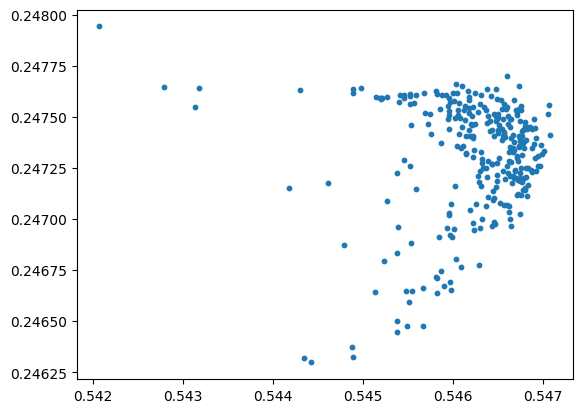

In [45]:
plt.scatter(x_1[:, 0], x_1[:, 1], s=10)

np.mean(make_moons(6000, noise=0.05)[0],axis=0)

(256, 2)

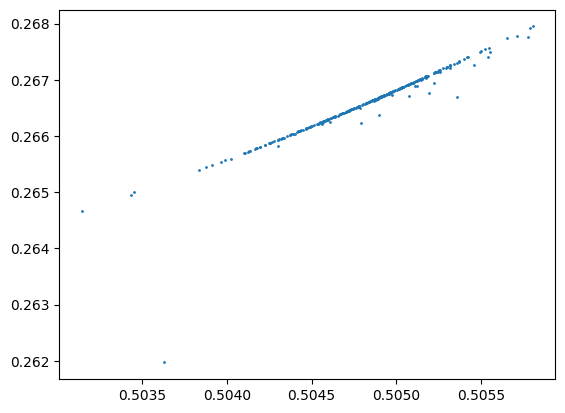

In [ ]:
plt.scatter(x_0[:, 0], x_0[:, 1], s=1)
plt.scatter(x_1[:, 0], x_1[:, 1], s=1)

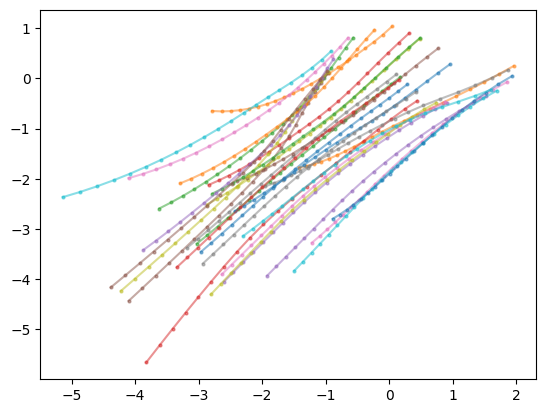

In [7]:
# sampling
import numpy as np
x = torch.randn(30, 2)-bias
n_steps = 20
time_steps = torch.linspace(0, 1.0, n_steps + 1)
all_steps_x = [x.detach()[:, 0],]
all_steps_y = [x.detach()[:, 1],]
for i in range(n_steps):
    x = flow.step(x, time_steps[i], time_steps[i + 1])
    all_steps_x.append(x.detach()[:, 0])
    all_steps_y.append(x.detach()[:, 1])
all_steps_x = np.array(all_steps_x).T
all_steps_y = np.array(all_steps_y).T

for i in range(all_steps_x.shape[0]):
    plt.plot(all_steps_x[i], all_steps_y[i], 'o-', markersize=2, alpha=0.5)






# fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4), sharex=True, sharey=True) 
# time_steps = torch.linspace(0, 1.0, n_steps + 1)

# axes[0].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10) 
# axes[0].set_title(f't = {time_steps[0]:.2f}') 
# axes[0].set_xlim(-3.0, 3.0)
# axes[0].set_ylim(-3.0, 3.0)
# for i in range(n_steps):
#     x = flow.step(x, time_steps[i], time_steps[i + 1])
#     axes[0].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10) 
#     axes[0].set_title(f't = {time_steps[i + 1]:.2f}')
# plt.tight_layout()
# plt.show()

In [15]:
all_steps_x.shape

(9, 30)